In [161]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [162]:

CD_data_path = "Cardiovascular_Disease_Data.csv"
census_data_path = "2018_Census_Data.csv"
CD_data = pd.read_csv(CD_data_path, low_memory=False)
census_data = pd.read_csv(census_data_path, low_memory= False)

In [163]:
us_abbrev_to_State = {
    "AL" : "Alabama",
    "AK":"Alaska" ,
    "AZ":"Arizona",
    "AR":"Arkansas" ,
    "CA":"California" ,
    "CO":"Colorado" ,
    "CT":"Connecticut" ,
    "DE":"Delaware" ,
    "FL":"Florida" ,
    "GA":"Georgia" ,
    "HI":"Hawaii" ,
    "ID":"Idaho" ,
    "IL":"Illinois" ,
    "IN":"Indiana" ,
    "IA":"Iowa" ,
    "KS":"Kansas" ,
    "KY":"Kentucky" ,
    "LA":"Louisiana" ,
    "ME":"Maine" ,
    "MD":"Maryland" ,
    "MA":"Massachusetts" ,
    "MI":"Michigan" ,
    "MN":"Minnesota" ,
    "MS":"Mississippi" ,
    "MO":"Missouri" ,
    "MT":"Montana" ,
    "NE":"Nebraska" ,
    "NV":"Nevada" ,
    "NH":"New Hampshire" ,
    "NJ":"New Jersey" ,
    "NM":"New Mexico" ,
    "NY":"New York" ,
    "NC":"North Carolina" ,
    "ND":"North Dakota" ,
    "OH":"Ohio" ,
    "OK":"Oklahoma" ,
    "OR":"Oregon" ,
    "PA":"Pennsylvania" ,
    "RI":"Rhode Island" ,
    "SC":"South Carolina" ,
    "SD":"South Dakota" ,
    "TN":"Tennessee" ,
    "TX":"Texas" ,
    "UT":"Utah" ,
    "VT":"Vermont" ,
    "VA":"Virginia" ,
    "WA":"Washington" ,
    "WV":"West Virginia" ,
    "WI":"Wisconsin" ,
    "WY":"Wyoming" ,
    "DC":"District of Columbia" ,
    "AS":"American Samoa" ,
    "GU":"Guam" ,
    "MP":"Northern Mariana Islands" ,
    "PR":"Puerto Rico" ,
    "UM":"United States Minor Outlying Islands" ,
    "VI":"U.S. Virgin Islands"
}

In [164]:
CD_data.head()
# census_data.head()

,LocationID,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,TopicID,X_long,Y_lat
0,1035.0,2005-2011,AL,Conecuh,County,NVSS,Cardiovascular Diseases,Stroke,-23.0,%,Total percent change,NaN,NaN,-39.5,-3.5,Age group,Ages 65 years and older,T6,-86.993772,31.429331
1,1035.0,1999-2005,AL,Conecuh,County,NVSS,Cardiovascular Diseases,Coronary Heart Disease,-21.9,%,Total percent change,NaN,NaN,-39.4,-1.2,Age group,Ages 65 years and older,T2,-86.993772,31.429331
2,1045.0,2005-2011,AL,Dale,County,NVSS,Cardiovascular Diseases,Stroke,-9.7,%,Total percent change,NaN,NaN,-25.2,9.1,Age group,Ages 65 years and older,T6,-85.610959,31.431720
3,1001.0,1999,AL,Autauga,County,NVSS,Cardiovascular Diseases,Stroke,24.9,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,18.1,33.4,Age group,Ages 35-64 years,T6,-86.642959,32.535306
4,1001.0,2009,AL,Autauga,County,NVSS,Cardiovascular Diseases,Stroke,21.6,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,17.1,26.6,Age group,Ages 35-64 years,T6,-86.642959,32.535306


In [165]:
CD_data= CD_data.loc[CD_data["Year"]=="2018", :] # filtering data to show only year 2018
CD_data.head()

,LocationID,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,TopicID,X_long,Y_lat
21,1001.0,2018,AL,Autauga,County,NVSS,Cardiovascular Diseases,Stroke,23.5,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,19.2,29.2,Age group,Ages 35-64 years,T6,-86.642959,32.535306
42,1001.0,2018,AL,Autauga,County,NVSS,Cardiovascular Diseases,Coronary Heart Disease,87.9,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,70.7,106.2,Age group,Ages 35-64 years,T2,-86.642959,32.535306
62,1001.0,2018,AL,Autauga,County,NVSS,Cardiovascular Diseases,Stroke,368.6,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,314.1,427.7,Age group,Ages 65 years and older,T6,-86.642959,32.535306
82,1001.0,2018,AL,Autauga,County,NVSS,Cardiovascular Diseases,Coronary Heart Disease,689.9,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,595.5,779.3,Age group,Ages 65 years and older,T2,-86.642959,32.535306
115,1003.0,2018,AL,Baldwin,County,NVSS,Cardiovascular Diseases,Stroke,18.1,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NaN,NaN,14.8,21.8,Age group,Ages 35-64 years,T6,-87.722741,30.727672


In [166]:
CD_data = CD_data[["Year", 
                   "LocationAbbr", 
                   "LocationDesc", 
                   "Topic", 
                   "Data_Value", 
                   "Stratification1"]] # Grabbing relevant columns
CD_data.head()

,Year,LocationAbbr,LocationDesc,Topic,Data_Value,Stratification1
21,2018,AL,Autauga,Stroke,23.5,Ages 35-64 years
42,2018,AL,Autauga,Coronary Heart Disease,87.9,Ages 35-64 years
62,2018,AL,Autauga,Stroke,368.6,Ages 65 years and older
82,2018,AL,Autauga,Coronary Heart Disease,689.9,Ages 65 years and older
115,2018,AL,Baldwin,Stroke,18.1,Ages 35-64 years


In [167]:
#Renaming columns for easy understanding
CD_data.rename(columns={"LocationAbbr":"State", "LocationDesc":"County", "Topic":"Disease Type", "Stratification1":"Age Group", "Data_Value":"Mortality per 100K"}, inplace=True)

CD_data.head()

,Year,State,County,Disease Type,Mortality per 100K,Age Group
21,2018,AL,Autauga,Stroke,23.5,Ages 35-64 years
42,2018,AL,Autauga,Coronary Heart Disease,87.9,Ages 35-64 years
62,2018,AL,Autauga,Stroke,368.6,Ages 65 years and older
82,2018,AL,Autauga,Coronary Heart Disease,689.9,Ages 65 years and older
115,2018,AL,Baldwin,Stroke,18.1,Ages 35-64 years


In [168]:
CD_data["County, State"] = CD_data["County"] + " County, " + CD_data["State"] #to merge with Census data based on this colum
CD_data.head()

,Year,State,County,Disease Type,Mortality per 100K,Age Group,"County, State"
21,2018,AL,Autauga,Stroke,23.5,Ages 35-64 years,"Autauga County, AL"
42,2018,AL,Autauga,Coronary Heart Disease,87.9,Ages 35-64 years,"Autauga County, AL"
62,2018,AL,Autauga,Stroke,368.6,Ages 65 years and older,"Autauga County, AL"
82,2018,AL,Autauga,Coronary Heart Disease,689.9,Ages 65 years and older,"Autauga County, AL"
115,2018,AL,Baldwin,Stroke,18.1,Ages 35-64 years,"Baldwin County, AL"


In [169]:
#state full form

CD_data["States"]=  CD_data["State"].replace(us_abbrev_to_State)
CD_data

,Year,State,County,Disease Type,Mortality per 100K,Age Group,"County, State",States
21,2018,AL,Autauga,Stroke,23.5,Ages 35-64 years,"Autauga County, AL",Alabama
42,2018,AL,Autauga,Coronary Heart Disease,87.9,Ages 35-64 years,"Autauga County, AL",Alabama
62,2018,AL,Autauga,Stroke,368.6,Ages 65 years and older,"Autauga County, AL",Alabama
82,2018,AL,Autauga,Coronary Heart Disease,689.9,Ages 65 years and older,"Autauga County, AL",Alabama
115,2018,AL,Baldwin,Stroke,18.1,Ages 35-64 years,"Baldwin County, AL",Alabama
...,...,...,...,...,...,...,...,...
288419,2018,WY,Washakie,Coronary Heart Disease,436.8,Ages 65 years and older,"Washakie County, WY",Wyoming
288421,2018,WY,Weston,Coronary Heart Disease,58.3,Ages 35-64 years,"Weston County, WY",Wyoming
288440,2018,WY,Weston,Stroke,236.5,Ages 65 years and older,"Weston County, WY",Wyoming
288460,2018,WY,Weston,Coronary Heart Disease,592.8,Ages 65 years and older,"Weston County, WY",Wyoming


In [170]:
CD_data = CD_data[["Year", "County, State", "States","Disease Type", "Mortality per 100K", "Age Group"]]
CD_data

,Year,"County, State",States,Disease Type,Mortality per 100K,Age Group
21,2018,"Autauga County, AL",Alabama,Stroke,23.5,Ages 35-64 years
42,2018,"Autauga County, AL",Alabama,Coronary Heart Disease,87.9,Ages 35-64 years
62,2018,"Autauga County, AL",Alabama,Stroke,368.6,Ages 65 years and older
82,2018,"Autauga County, AL",Alabama,Coronary Heart Disease,689.9,Ages 65 years and older
115,2018,"Baldwin County, AL",Alabama,Stroke,18.1,Ages 35-64 years
...,...,...,...,...,...,...
288419,2018,"Washakie County, WY",Wyoming,Coronary Heart Disease,436.8,Ages 65 years and older
288421,2018,"Weston County, WY",Wyoming,Coronary Heart Disease,58.3,Ages 35-64 years
288440,2018,"Weston County, WY",Wyoming,Stroke,236.5,Ages 65 years and older
288460,2018,"Weston County, WY",Wyoming,Coronary Heart Disease,592.8,Ages 65 years and older


In [171]:
#cleaning 2018 census data
census_data = census_data[["STATE",
                           "COUNTY",
                           "ACS_MEDIAN_HH_INC",
                           "ACS_PCT_COLLEGE_ASSOCIATE_DGR",
                           "ACS_PCT_BACHELOR_DGR",
                           "ACS_PCT_GRADUATE_DGR",
                           "ACS_PCT_HS_GRADUATE",
                           "ACS_PCT_LT_HS",
                           "ACS_PCT_MEDICARE_ONLY",
                           "ACS_PCT_PRIVATE_ANY",
                           "ACS_PCT_UNINSURED"]] # Grabbing relevant columns
census_data.head()

census_data.rename(columns={"STATE": "State", "COUNTY": "County", "ACS_MEDIAN_HH_INC":"County Median Income", "ACS_PCT_COLLEGE_ASSOCIATE_DGR" : "% College/Associate's Degree",
                            "ACS_PCT_BACHELOR_DGR":"% Bachelor Degree", "ACS_PCT_GRADUATE_DGR": "% Graduate Degree" , "ACS_PCT_HS_GRADUATE": "% Only HS Degree",
                             "ACS_PCT_LT_HS": "% less than a HS Degree", "ACS_PCT_MEDICARE_ONLY" : "% Medicare Only",
                               "ACS_PCT_PRIVATE_ANY" : "% Private Insurance Only", "ACS_PCT_UNINSURED" : "% Uninsured"  }, inplace= True)
# census_data.columns = ["State",
#                        "County",
#                        "County Median Income",
#                        "% College/Associate's Degree",
#                        "% Bachelor Degree",
#                        "% Graduate Degree",
#                        "% Only HS Degree",
#                        "% less than a HS Degree",
#                        "% Medicare Only",
#                        "% Private Insurance Only",
#                        "% Uninsured"]


census_data.head()

,State,County,County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured
0,Alabama,Autauga County,58625.0,25.10,18.11,13.35,34.00,9.44,5.20,58.92,9.26
1,Alabama,Autauga County,43531.0,25.64,12.61,4.16,40.61,16.98,4.78,49.09,10.43
2,Alabama,Autauga County,51875.0,33.00,10.35,8.56,35.33,12.76,3.20,56.55,3.43
3,Alabama,Autauga County,54050.0,28.17,21.74,10.94,33.19,5.96,7.02,68.16,2.85
4,Alabama,Autauga County,72417.0,28.10,22.22,22.34,20.23,7.12,3.15,64.46,4.25


In [172]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [173]:
census_data["State Abbrv"]=  census_data["State"].replace(us_state_to_abbrev)
census_data.head()

,State,County,County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured,State Abbrv
0,Alabama,Autauga County,58625.0,25.10,18.11,13.35,34.00,9.44,5.20,58.92,9.26,AL
1,Alabama,Autauga County,43531.0,25.64,12.61,4.16,40.61,16.98,4.78,49.09,10.43,AL
2,Alabama,Autauga County,51875.0,33.00,10.35,8.56,35.33,12.76,3.20,56.55,3.43,AL
3,Alabama,Autauga County,54050.0,28.17,21.74,10.94,33.19,5.96,7.02,68.16,2.85,AL
4,Alabama,Autauga County,72417.0,28.10,22.22,22.34,20.23,7.12,3.15,64.46,4.25,AL


In [174]:
census_data["County, State"] = census_data["County"] + ", " + census_data["State Abbrv"]
census_data.head() 
#creating column to merge with Cardiovascular Data DF

,State,County,County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured,State Abbrv,"County, State"
0,Alabama,Autauga County,58625.0,25.10,18.11,13.35,34.00,9.44,5.20,58.92,9.26,AL,"Autauga County, AL"
1,Alabama,Autauga County,43531.0,25.64,12.61,4.16,40.61,16.98,4.78,49.09,10.43,AL,"Autauga County, AL"
2,Alabama,Autauga County,51875.0,33.00,10.35,8.56,35.33,12.76,3.20,56.55,3.43,AL,"Autauga County, AL"
3,Alabama,Autauga County,54050.0,28.17,21.74,10.94,33.19,5.96,7.02,68.16,2.85,AL,"Autauga County, AL"
4,Alabama,Autauga County,72417.0,28.10,22.22,22.34,20.23,7.12,3.15,64.46,4.25,AL,"Autauga County, AL"


In [175]:
census_data.columns

Index(['State', 'County', 'County Median Income',
       '% College/Associate's Degree', '% Bachelor Degree',
       '% Graduate Degree', '% Only HS Degree', '% less than a HS Degree',
       '% Medicare Only', '% Private Insurance Only', '% Uninsured',
       'State Abbrv', 'County, State'],
      dtype='object')

In [176]:
census_data= census_data[["County, State", 'County Median Income', "% College/Associate's Degree",
       '% Bachelor Degree', '% Graduate Degree', '% Only HS Degree',
       '% less than a HS Degree', '% Medicare Only',
       '% Private Insurance Only', '% Uninsured' ]]
census_data.head()

,"County, State",County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured
0,"Autauga County, AL",58625.0,25.10,18.11,13.35,34.00,9.44,5.20,58.92,9.26
1,"Autauga County, AL",43531.0,25.64,12.61,4.16,40.61,16.98,4.78,49.09,10.43
2,"Autauga County, AL",51875.0,33.00,10.35,8.56,35.33,12.76,3.20,56.55,3.43
3,"Autauga County, AL",54050.0,28.17,21.74,10.94,33.19,5.96,7.02,68.16,2.85
4,"Autauga County, AL",72417.0,28.10,22.22,22.34,20.23,7.12,3.15,64.46,4.25


In [177]:
census_data = round(census_data.groupby("County, State").mean(), 3)
census_data.head()

,County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured
"County, State",,,,,,,,,
"Abbeville County, SC",36844.167,29.807,10.778,4.603,34.865,19.947,7.388,49.285,11.667
"Acadia Parish, LA",44548.500,23.332,9.213,3.847,40.906,22.704,5.072,51.140,11.477
"Accomack County, VA",43617.250,24.197,10.535,7.339,38.641,19.290,6.321,54.076,16.768
"Ada County, ID",64591.136,33.415,25.650,13.640,22.264,5.032,4.035,68.892,8.849
"Adair County, IA",52820.333,36.087,12.030,3.597,42.560,5.730,5.297,64.253,6.013


In [178]:
df= pd.merge(CD_data, census_data, on = "County, State").dropna(axis=0)
df

,Year,"County, State",States,Disease Type,Mortality per 100K,Age Group,County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured
0,2018,"Autauga County, AL",Alabama,Stroke,23.5,Ages 35-64 years,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
1,2018,"Autauga County, AL",Alabama,Coronary Heart Disease,87.9,Ages 35-64 years,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
2,2018,"Autauga County, AL",Alabama,Stroke,368.6,Ages 65 years and older,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
3,2018,"Autauga County, AL",Alabama,Coronary Heart Disease,689.9,Ages 65 years and older,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
4,2018,"Baldwin County, AL",Alabama,Stroke,18.1,Ages 35-64 years,56782.71,30.155,19.429,10.212,29.693,10.512,7.462,59.858,10.276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12043,2018,"Washakie County, WY",Wyoming,Coronary Heart Disease,436.8,Ages 65 years and older,53835.00,37.873,14.827,6.427,30.323,10.550,6.840,62.403,15.430
12044,2018,"Weston County, WY",Wyoming,Coronary Heart Disease,58.3,Ages 35-64 years,53141.00,37.205,13.465,5.705,35.850,7.770,8.140,63.770,13.325
12045,2018,"Weston County, WY",Wyoming,Stroke,236.5,Ages 65 years and older,53141.00,37.205,13.465,5.705,35.850,7.770,8.140,63.770,13.325
12046,2018,"Weston County, WY",Wyoming,Coronary Heart Disease,592.8,Ages 65 years and older,53141.00,37.205,13.465,5.705,35.850,7.770,8.140,63.770,13.325


In [179]:
df_group = df.groupby(["Disease Type", "Age Group"]).value_counts()
df_group


Disease Type            Age Group                Year  County, State           States          Mortality per 100K  County Median Income  % College/Associate's Degree  % Bachelor Degree  % Graduate Degree  % Only HS Degree  % less than a HS Degree  % Medicare Only  % Private Insurance Only  % Uninsured
Coronary Heart Disease  Ages 35-64 years         2018  Abbeville County, SC    South Carolina  70.3                36844.167             29.807                        10.778             4.603              34.865            19.947                   7.388            49.285                    11.667         1
                                                       Accomack County, VA     Virginia        93.4                43617.250             24.197                        10.535             7.339              38.641            19.290                   6.321            54.076                    16.768         1
                                                       New Hanover County, NC  No

In [180]:
stats = ['mean',
         'median', 
         'std',
         'min',
         'max',
         
]

df_stats= df.groupby(["Disease Type", "Age Group"])["Mortality per 100K"].agg(func=stats)
df_stats

mean  median  \
Disease Type           Age Group                                     
Coronary Heart Disease Ages 35-64 years          70.898076    64.2   
                       Ages 65 years and older  628.655387   605.9   
Stroke                 Ages 35-64 years          16.864551    15.3   
                       Ages 65 years and older  267.846506   262.2   

                                                       std    min     max  
Disease Type           Age Group                                           
Coronary Heart Disease Ages 35-64 years          31.149991   13.3   300.7  
                       Ages 65 years and older  175.914496  207.1  1609.8  
Stroke                 Ages 35-64 years           6.306468    5.6    48.1  
                       Ages 65 years and older   48.985936  107.9   596.4

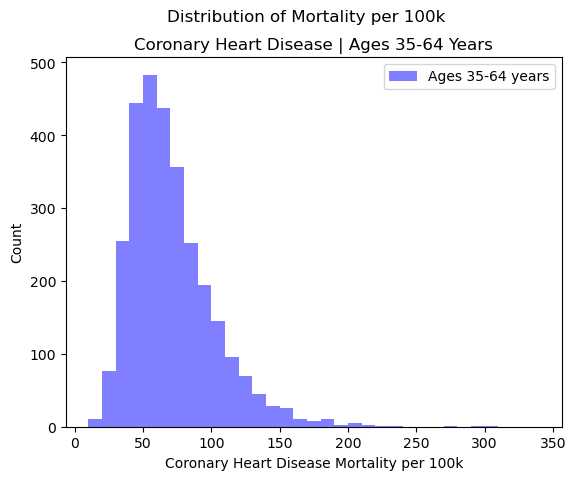

In [181]:
bins = list(range(10, 350, 10))
plt.hist(df[(df["Age Group"]== "Ages 35-64 years") & (df["Disease Type"] == "Coronary Heart Disease")]["Mortality per 100K"], bins, alpha = 0.5, color = "blue", label = "Ages 35-64 years")
plt.xlabel("Coronary Heart Disease Mortality per 100k")
plt.ylabel("Count")
plt.suptitle("Distribution of Mortality per 100k")
plt.title("Coronary Heart Disease | Ages 35-64 Years")
plt.legend()
plt.show()

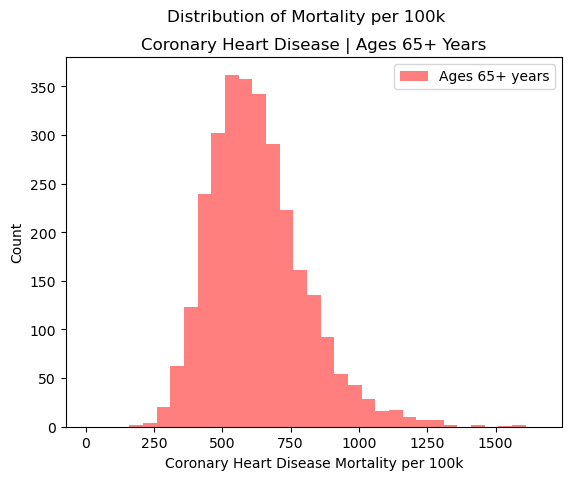

In [182]:
bins = list(range(10, 1700, 50))
plt.hist(df[(df["Age Group"]== "Ages 65 years and older") & (df["Disease Type"] == "Coronary Heart Disease")]["Mortality per 100K"], bins, alpha = 0.5, color = "red", label = "Ages 65+ years")
plt.xlabel("Coronary Heart Disease Mortality per 100k")
plt.ylabel("Count")
plt.suptitle("Distribution of Mortality per 100k")
plt.title("Coronary Heart Disease | Ages 65+ Years")
plt.legend()
plt.show()

In [183]:
df_group = df.groupby(["States"])["Mortality per 100K"].mean()

df_group.head()

States
Alabama       239.662313
Arizona       224.500000
Arkansas      306.161333
California    220.022368
Colorado      175.618487
Name: Mortality per 100K, dtype: float64

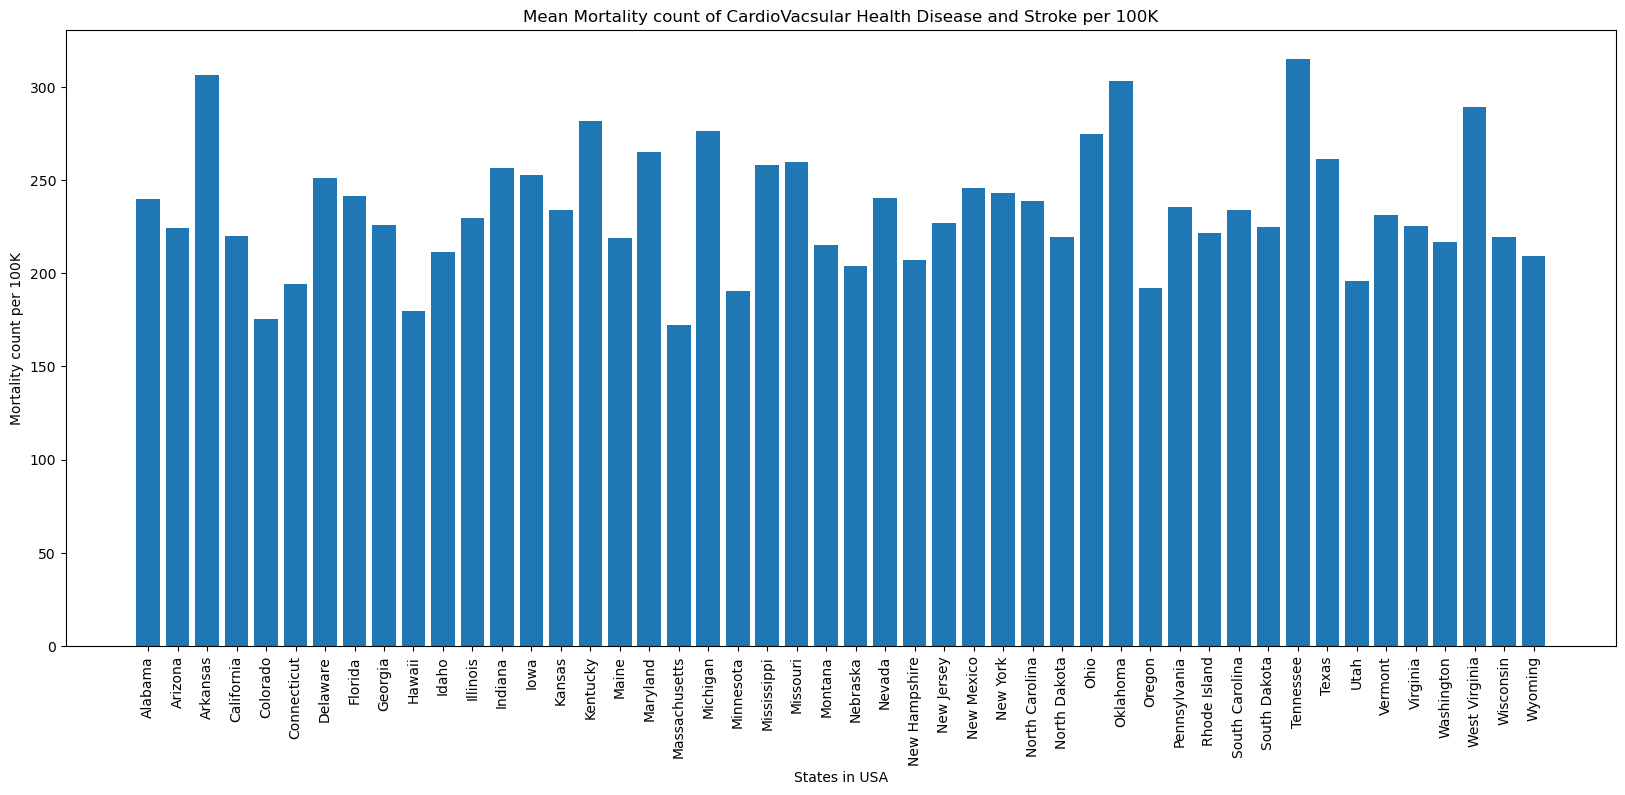

In [184]:
# x = df[(df["Disease Type"] == "Coronary Heart Disease")]["States"]
# x

# y= df_group
plt.figure(figsize=(20,8))
plt.bar(df_group.index, df_group )
plt.title("Mean Mortality count of CardioVacsular Health Disease and Stroke per 100K")
plt.xticks(rotation ="vertical")
plt.xlabel("States in USA")
plt.ylabel("Mortality count per 100K")
plt.show()

In [185]:
df

,Year,"County, State",States,Disease Type,Mortality per 100K,Age Group,County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured
0,2018,"Autauga County, AL",Alabama,Stroke,23.5,Ages 35-64 years,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
1,2018,"Autauga County, AL",Alabama,Coronary Heart Disease,87.9,Ages 35-64 years,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
2,2018,"Autauga County, AL",Alabama,Stroke,368.6,Ages 65 years and older,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
3,2018,"Autauga County, AL",Alabama,Coronary Heart Disease,689.9,Ages 65 years and older,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
4,2018,"Baldwin County, AL",Alabama,Stroke,18.1,Ages 35-64 years,56782.71,30.155,19.429,10.212,29.693,10.512,7.462,59.858,10.276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12043,2018,"Washakie County, WY",Wyoming,Coronary Heart Disease,436.8,Ages 65 years and older,53835.00,37.873,14.827,6.427,30.323,10.550,6.840,62.403,15.430
12044,2018,"Weston County, WY",Wyoming,Coronary Heart Disease,58.3,Ages 35-64 years,53141.00,37.205,13.465,5.705,35.850,7.770,8.140,63.770,13.325
12045,2018,"Weston County, WY",Wyoming,Stroke,236.5,Ages 65 years and older,53141.00,37.205,13.465,5.705,35.850,7.770,8.140,63.770,13.325
12046,2018,"Weston County, WY",Wyoming,Coronary Heart Disease,592.8,Ages 65 years and older,53141.00,37.205,13.465,5.705,35.850,7.770,8.140,63.770,13.325


In [186]:
df_age35= df.loc[(df["Age Group"]=="Ages 35-64 years") & (df["Disease Type"]=="Stroke")]
df_age35

,Year,"County, State",States,Disease Type,Mortality per 100K,Age Group,County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured
0,2018,"Autauga County, AL",Alabama,Stroke,23.5,Ages 35-64 years,55499.250,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
4,2018,"Baldwin County, AL",Alabama,Stroke,18.1,Ages 35-64 years,56782.710,30.155,19.429,10.212,29.693,10.512,7.462,59.858,10.276
8,2018,"Barbour County, AL",Alabama,Stroke,27.0,Ages 35-64 years,33632.111,24.744,8.478,4.901,35.504,26.369,5.899,45.039,11.281
14,2018,"Bibb County, AL",Alabama,Stroke,32.5,Ages 35-64 years,46878.500,24.718,8.065,4.145,47.615,15.455,7.348,60.625,7.285
16,2018,"Blount County, AL",Alabama,Stroke,20.2,Ages 35-64 years,48241.889,32.910,7.788,4.580,33.909,20.814,7.534,59.254,11.144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12028,2018,"Sweetwater County, WY",Wyoming,Stroke,11.2,Ages 35-64 years,72692.333,35.783,14.889,6.791,33.508,9.027,2.812,70.673,12.055
12032,2018,"Teton County, WY",Wyoming,Stroke,10.2,Ages 35-64 years,84741.250,24.310,38.995,18.975,12.948,4.778,3.165,79.055,10.075
12037,2018,"Uinta County, WY",Wyoming,Stroke,11.0,Ages 35-64 years,59718.667,37.350,10.323,4.880,40.133,7.310,4.577,66.067,12.490
12040,2018,"Washakie County, WY",Wyoming,Stroke,11.7,Ages 35-64 years,53835.000,37.873,14.827,6.427,30.323,10.550,6.840,62.403,15.430


In [187]:
df_age65 = df.loc[(df["Age Group"]=="Ages 65 years and older") & (df["Disease Type"]=="Stroke")]
df_age65

,Year,"County, State",States,Disease Type,Mortality per 100K,Age Group,County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured
2,2018,"Autauga County, AL",Alabama,Stroke,368.6,Ages 65 years and older,55499.250,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
5,2018,"Baldwin County, AL",Alabama,Stroke,320.3,Ages 65 years and older,56782.710,30.155,19.429,10.212,29.693,10.512,7.462,59.858,10.276
9,2018,"Barbour County, AL",Alabama,Stroke,297.1,Ages 65 years and older,33632.111,24.744,8.478,4.901,35.504,26.369,5.899,45.039,11.281
12,2018,"Bibb County, AL",Alabama,Stroke,384.1,Ages 65 years and older,46878.500,24.718,8.065,4.145,47.615,15.455,7.348,60.625,7.285
18,2018,"Blount County, AL",Alabama,Stroke,296.4,Ages 65 years and older,48241.889,32.910,7.788,4.580,33.909,20.814,7.534,59.254,11.144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12031,2018,"Sweetwater County, WY",Wyoming,Stroke,262.4,Ages 65 years and older,72692.333,35.783,14.889,6.791,33.508,9.027,2.812,70.673,12.055
12033,2018,"Teton County, WY",Wyoming,Stroke,201.2,Ages 65 years and older,84741.250,24.310,38.995,18.975,12.948,4.778,3.165,79.055,10.075
12036,2018,"Uinta County, WY",Wyoming,Stroke,233.2,Ages 65 years and older,59718.667,37.350,10.323,4.880,40.133,7.310,4.577,66.067,12.490
12042,2018,"Washakie County, WY",Wyoming,Stroke,209.8,Ages 65 years and older,53835.000,37.873,14.827,6.427,30.323,10.550,6.840,62.403,15.430


In [188]:
df_disease = df.loc[df["Disease Type"]=="Stroke", :]
df_disease

,Year,"County, State",States,Disease Type,Mortality per 100K,Age Group,County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured
0,2018,"Autauga County, AL",Alabama,Stroke,23.5,Ages 35-64 years,55499.250,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
2,2018,"Autauga County, AL",Alabama,Stroke,368.6,Ages 65 years and older,55499.250,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
4,2018,"Baldwin County, AL",Alabama,Stroke,18.1,Ages 35-64 years,56782.710,30.155,19.429,10.212,29.693,10.512,7.462,59.858,10.276
5,2018,"Baldwin County, AL",Alabama,Stroke,320.3,Ages 65 years and older,56782.710,30.155,19.429,10.212,29.693,10.512,7.462,59.858,10.276
8,2018,"Barbour County, AL",Alabama,Stroke,27.0,Ages 35-64 years,33632.111,24.744,8.478,4.901,35.504,26.369,5.899,45.039,11.281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12037,2018,"Uinta County, WY",Wyoming,Stroke,11.0,Ages 35-64 years,59718.667,37.350,10.323,4.880,40.133,7.310,4.577,66.067,12.490
12040,2018,"Washakie County, WY",Wyoming,Stroke,11.7,Ages 35-64 years,53835.000,37.873,14.827,6.427,30.323,10.550,6.840,62.403,15.430
12042,2018,"Washakie County, WY",Wyoming,Stroke,209.8,Ages 65 years and older,53835.000,37.873,14.827,6.427,30.323,10.550,6.840,62.403,15.430
12045,2018,"Weston County, WY",Wyoming,Stroke,236.5,Ages 65 years and older,53141.000,37.205,13.465,5.705,35.850,7.770,8.140,63.770,13.325


In [189]:
df_stroke35 = df_disease.loc[(df_disease["Age Group"]=="Ages 35-64 years")]
df_stroke35.head()



,Year,"County, State",States,Disease Type,Mortality per 100K,Age Group,County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured
0,2018,"Autauga County, AL",Alabama,Stroke,23.5,Ages 35-64 years,55499.250,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
4,2018,"Baldwin County, AL",Alabama,Stroke,18.1,Ages 35-64 years,56782.710,30.155,19.429,10.212,29.693,10.512,7.462,59.858,10.276
8,2018,"Barbour County, AL",Alabama,Stroke,27.0,Ages 35-64 years,33632.111,24.744,8.478,4.901,35.504,26.369,5.899,45.039,11.281
14,2018,"Bibb County, AL",Alabama,Stroke,32.5,Ages 35-64 years,46878.500,24.718,8.065,4.145,47.615,15.455,7.348,60.625,7.285
16,2018,"Blount County, AL",Alabama,Stroke,20.2,Ages 35-64 years,48241.889,32.910,7.788,4.580,33.909,20.814,7.534,59.254,11.144


In [190]:
df_stroke35_group = df_stroke35.groupby(["States"])["Mortality per 100K"].mean()

df_stroke35_group


States
Alabama           27.794030
Arizona           14.306667
Arkansas          25.365333
California        14.778947
Colorado          11.218033
Connecticut        8.037500
Delaware          15.800000
Florida           17.452239
Georgia           23.429560
Hawaii            18.075000
Idaho             13.011905
Illinois          14.609804
Indiana           15.942391
Iowa              11.308081
Kansas            15.346154
Kentucky          19.795000
Maine             12.293750
Maryland          14.441667
Massachusetts      8.392857
Michigan          14.144578
Minnesota         10.403448
Mississippi       32.063415
Missouri          16.507826
Montana           12.267347
Nebraska          12.505000
Nevada            15.526667
New Hampshire      9.320000
New Jersey        11.638095
New Mexico        14.546667
New York          10.638710
North Carolina    19.298000
North Dakota      13.802000
Ohio              14.985227
Oklahoma          20.971429
Oregon            13.617143
Pennsylvania 

In [191]:
df_stroke65 = df_disease.loc[(df_disease["Age Group"]=="Ages 65 years and older")]
df_stroke65.head()

,Year,"County, State",States,Disease Type,Mortality per 100K,Age Group,County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured
2,2018,"Autauga County, AL",Alabama,Stroke,368.6,Ages 65 years and older,55499.250,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
5,2018,"Baldwin County, AL",Alabama,Stroke,320.3,Ages 65 years and older,56782.710,30.155,19.429,10.212,29.693,10.512,7.462,59.858,10.276
9,2018,"Barbour County, AL",Alabama,Stroke,297.1,Ages 65 years and older,33632.111,24.744,8.478,4.901,35.504,26.369,5.899,45.039,11.281
12,2018,"Bibb County, AL",Alabama,Stroke,384.1,Ages 65 years and older,46878.500,24.718,8.065,4.145,47.615,15.455,7.348,60.625,7.285
18,2018,"Blount County, AL",Alabama,Stroke,296.4,Ages 65 years and older,48241.889,32.910,7.788,4.580,33.909,20.814,7.534,59.254,11.144


In [192]:
df_stroke65_group = df_stroke65.groupby(["States"])["Mortality per 100K"].mean()

df_stroke65_group

States
Alabama           330.482090
Arizona           217.760000
Arkansas          287.253333
California        267.733333
Colorado          228.510345
Connecticut       196.112500
Delaware          314.733333
Florida           269.964179
Georgia           305.925949
Hawaii            230.725000
Idaho             258.457143
Illinois          260.965686
Indiana           281.651087
Iowa              233.556566
Kansas            247.523958
Kentucky          294.797479
Maine             259.675000
Maryland          288.608333
Massachusetts     205.907143
Michigan          294.296386
Minnesota         233.895402
Mississippi       311.040741
Missouri          269.013043
Montana           226.551111
Nebraska          228.565789
Nevada            239.214286
New Hampshire     208.970000
New Jersey        221.433333
New Mexico        213.320690
New York          200.106452
North Carolina    292.334000
North Dakota      240.653488
Ohio              292.921591
Oklahoma          264.648052
Oregon 

In [193]:
df_stroke_35_65 = pd.merge(df_stroke35_group, df_stroke65_group, on = "States")
df_stroke_35_65.rename(columns={"Mortality per 100K_x":"Mean State Mortality per 100K for Age group 35-64 years", "Mortality per 100K_y":"Mean State Mortality per 100K for Age group 65+ years"}, inplace=True)
df_stroke_35_65

,Mean State Mortality per 100K for Age group 35-64 years,Mean State Mortality per 100K for Age group 65+ years
States,,
Alabama,27.794030,330.482090
Arizona,14.306667,217.760000
Arkansas,25.365333,287.253333
California,14.778947,267.733333
Colorado,11.218033,228.510345
Connecticut,8.037500,196.112500
Delaware,15.800000,314.733333
Florida,17.452239,269.964179
Georgia,23.429560,305.925949


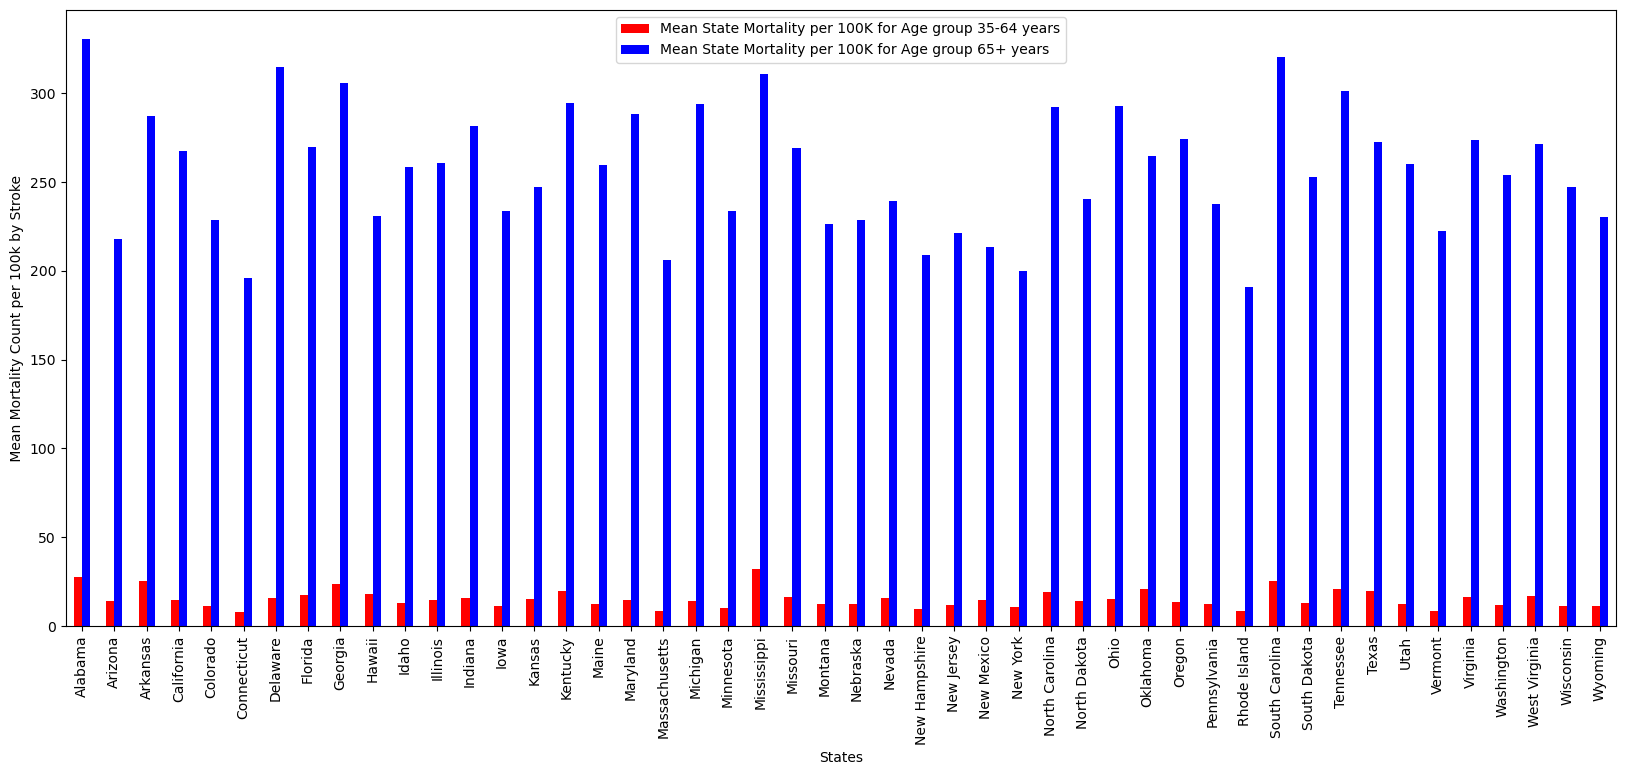

In [194]:
bar_chart_states_stroke_data = df_stroke_35_65.plot(kind = "bar", color = ["red", "blue"], figsize=(20,8), ylabel=" Mean Mortality Count per 100k by Stroke ")
plt.title ("Average Mortality per 100K by Stroke for two age groups")
plt.show()

In [195]:
df

,Year,"County, State",States,Disease Type,Mortality per 100K,Age Group,County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured
0,2018,"Autauga County, AL",Alabama,Stroke,23.5,Ages 35-64 years,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
1,2018,"Autauga County, AL",Alabama,Coronary Heart Disease,87.9,Ages 35-64 years,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
2,2018,"Autauga County, AL",Alabama,Stroke,368.6,Ages 65 years and older,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
3,2018,"Autauga County, AL",Alabama,Coronary Heart Disease,689.9,Ages 65 years and older,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
4,2018,"Baldwin County, AL",Alabama,Stroke,18.1,Ages 35-64 years,56782.71,30.155,19.429,10.212,29.693,10.512,7.462,59.858,10.276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12043,2018,"Washakie County, WY",Wyoming,Coronary Heart Disease,436.8,Ages 65 years and older,53835.00,37.873,14.827,6.427,30.323,10.550,6.840,62.403,15.430
12044,2018,"Weston County, WY",Wyoming,Coronary Heart Disease,58.3,Ages 35-64 years,53141.00,37.205,13.465,5.705,35.850,7.770,8.140,63.770,13.325
12045,2018,"Weston County, WY",Wyoming,Stroke,236.5,Ages 65 years and older,53141.00,37.205,13.465,5.705,35.850,7.770,8.140,63.770,13.325
12046,2018,"Weston County, WY",Wyoming,Coronary Heart Disease,592.8,Ages 65 years and older,53141.00,37.205,13.465,5.705,35.850,7.770,8.140,63.770,13.325


In [196]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 35-64 years")]
data
# x = data["County Median Income"]
# x


,Year,"County, State",States,Disease Type,Mortality per 100K,Age Group,County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured
1,2018,"Autauga County, AL",Alabama,Coronary Heart Disease,87.9,Ages 35-64 years,55499.250,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
7,2018,"Baldwin County, AL",Alabama,Coronary Heart Disease,73.4,Ages 35-64 years,56782.710,30.155,19.429,10.212,29.693,10.512,7.462,59.858,10.276
10,2018,"Barbour County, AL",Alabama,Coronary Heart Disease,39.4,Ages 35-64 years,33632.111,24.744,8.478,4.901,35.504,26.369,5.899,45.039,11.281
13,2018,"Bibb County, AL",Alabama,Coronary Heart Disease,60.4,Ages 35-64 years,46878.500,24.718,8.065,4.145,47.615,15.455,7.348,60.625,7.285
19,2018,"Blount County, AL",Alabama,Coronary Heart Disease,63.5,Ages 35-64 years,48241.889,32.910,7.788,4.580,33.909,20.814,7.534,59.254,11.144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12030,2018,"Sweetwater County, WY",Wyoming,Coronary Heart Disease,50.0,Ages 35-64 years,72692.333,35.783,14.889,6.791,33.508,9.027,2.812,70.673,12.055
12034,2018,"Teton County, WY",Wyoming,Coronary Heart Disease,27.0,Ages 35-64 years,84741.250,24.310,38.995,18.975,12.948,4.778,3.165,79.055,10.075
12039,2018,"Uinta County, WY",Wyoming,Coronary Heart Disease,35.1,Ages 35-64 years,59718.667,37.350,10.323,4.880,40.133,7.310,4.577,66.067,12.490
12041,2018,"Washakie County, WY",Wyoming,Coronary Heart Disease,48.5,Ages 35-64 years,53835.000,37.873,14.827,6.427,30.323,10.550,6.840,62.403,15.430


In [197]:
data_groupby_state_mortality = data.groupby(["States"])["Mortality per 100K"].mean()  #state median income 
data_groupby_state_mortality

States
Alabama            74.156716
Arizona            62.020000
Arkansas          114.700000
California         47.568421
Colorado           40.516393
Connecticut        41.262500
Delaware           47.633333
Florida            65.868657
Georgia            70.294340
Hawaii             44.425000
Idaho              46.245238
Illinois           65.816667
Indiana            70.477174
Iowa               63.355556
Kansas             66.942308
Kentucky          110.032500
Maine              41.450000
Maryland           54.229167
Massachusetts      34.864286
Michigan           71.263855
Minnesota          44.196552
Mississippi        94.403659
Missouri           85.906957
Montana            66.408163
Nebraska           48.905000
Nevada             60.606667
New Hampshire      48.190000
New Jersey         46.866667
New Mexico         72.746667
New York           55.211290
North Carolina     70.613000
North Dakota       62.052000
Ohio               73.262500
Oklahoma           95.200000
Oregon 

In [198]:
data_groupby_state_medianincome = data.groupby(["States"])["County Median Income"].mean()
data_groupby_state_medianincome

States
Alabama           41685.122448
Arizona           47340.593533
Arkansas          41132.956987
California        66740.391491
Colorado          57933.697492
Connecticut       81034.953750
Delaware          63720.642000
Florida           50347.108910
Georgia           46134.560113
Hawaii            73559.553500
Idaho             49395.344690
Illinois          55394.549961
Indiana           54247.477424
Iowa              55893.282778
Kansas            51886.527654
Kentucky          43665.915950
Maine             52101.630875
Maryland          78784.505833
Massachusetts     77515.760000
Michigan          50458.175639
Minnesota         60396.225506
Mississippi       38274.205268
Missouri          47074.340687
Montana           50607.175551
Nebraska          54369.353375
Nevada            62195.308933
New Hampshire     68953.207700
New Jersey        83854.978381
New Mexico        43092.844300
New York          61632.259726
North Carolina    47147.135980
North Dakota      61553.870720
O

-0.0012589682939975334
The correlation coefficient is -0.69064
The rate of change of dependent variable i.e Mortality per 100K for age group 35-64 Decreases as Median Income of State Increases, indicating Higher the Income of household 
the lesser the chance of a person dying of Cardiovascular Health Disease. This is Also backed by the Rvalue showing a higher tendancy towards a negatvie co releation 


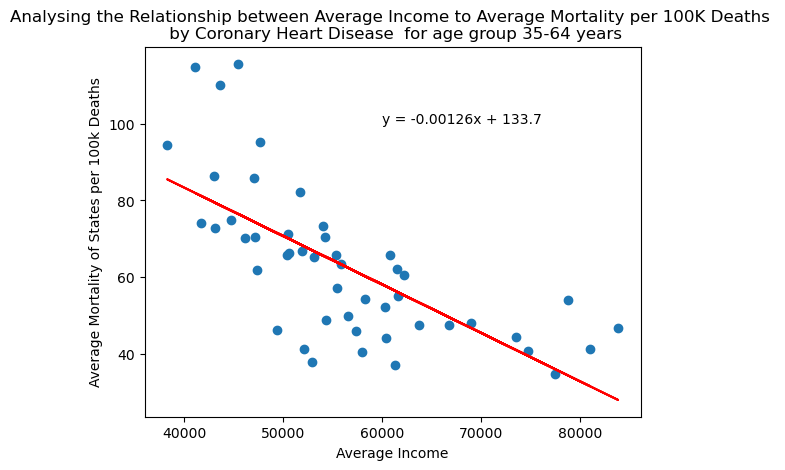

In [199]:
x = data_groupby_state_medianincome
y = data_groupby_state_mortality
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(60000,100), fontsize=10)
plt.ylabel("Average Mortality of States per 100k Deaths")
plt.xlabel("Average Income")
plt.title("Analysing the Relationship between Average Income to Average Mortality per 100K Deaths \n by Coronary Heart Disease  for age group 35-64 years")
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")
if slope < 0 :
    print("The rate of change of dependent variable i.e Mortality per 100K for age group 35-64 Decreases as Median Income of State Increases, indicating Higher the Income of household \nthe lesser the chance of a person dying of Cardiovascular Health Disease. This is Also backed by the Rvalue showing a higher tendancy towards a negatvie co releation ")
else:
    print(" The rate of change of dependent variable i.e Mortality per 100K for age group 35-64 increases as Median Income of State increases ")

In [200]:
data1_stroke = df[(df["Disease Type"] == "Stroke") & (df["Age Group"] == "Ages 35-64 years")]
data1_stroke

,Year,"County, State",States,Disease Type,Mortality per 100K,Age Group,County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured
0,2018,"Autauga County, AL",Alabama,Stroke,23.5,Ages 35-64 years,55499.250,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
4,2018,"Baldwin County, AL",Alabama,Stroke,18.1,Ages 35-64 years,56782.710,30.155,19.429,10.212,29.693,10.512,7.462,59.858,10.276
8,2018,"Barbour County, AL",Alabama,Stroke,27.0,Ages 35-64 years,33632.111,24.744,8.478,4.901,35.504,26.369,5.899,45.039,11.281
14,2018,"Bibb County, AL",Alabama,Stroke,32.5,Ages 35-64 years,46878.500,24.718,8.065,4.145,47.615,15.455,7.348,60.625,7.285
16,2018,"Blount County, AL",Alabama,Stroke,20.2,Ages 35-64 years,48241.889,32.910,7.788,4.580,33.909,20.814,7.534,59.254,11.144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12028,2018,"Sweetwater County, WY",Wyoming,Stroke,11.2,Ages 35-64 years,72692.333,35.783,14.889,6.791,33.508,9.027,2.812,70.673,12.055
12032,2018,"Teton County, WY",Wyoming,Stroke,10.2,Ages 35-64 years,84741.250,24.310,38.995,18.975,12.948,4.778,3.165,79.055,10.075
12037,2018,"Uinta County, WY",Wyoming,Stroke,11.0,Ages 35-64 years,59718.667,37.350,10.323,4.880,40.133,7.310,4.577,66.067,12.490
12040,2018,"Washakie County, WY",Wyoming,Stroke,11.7,Ages 35-64 years,53835.000,37.873,14.827,6.427,30.323,10.550,6.840,62.403,15.430


In [201]:
data_groupby_state_mortality_stroke = data1_stroke.groupby(["States"])["Mortality per 100K"].mean()  #state median income 
data_groupby_state_mortality_stroke

States
Alabama           27.794030
Arizona           14.306667
Arkansas          25.365333
California        14.778947
Colorado          11.218033
Connecticut        8.037500
Delaware          15.800000
Florida           17.452239
Georgia           23.429560
Hawaii            18.075000
Idaho             13.011905
Illinois          14.609804
Indiana           15.942391
Iowa              11.308081
Kansas            15.346154
Kentucky          19.795000
Maine             12.293750
Maryland          14.441667
Massachusetts      8.392857
Michigan          14.144578
Minnesota         10.403448
Mississippi       32.063415
Missouri          16.507826
Montana           12.267347
Nebraska          12.505000
Nevada            15.526667
New Hampshire      9.320000
New Jersey        11.638095
New Mexico        14.546667
New York          10.638710
North Carolina    19.298000
North Dakota      13.802000
Ohio              14.985227
Oklahoma          20.971429
Oregon            13.617143
Pennsylvania 

In [202]:
data_groupby_state_less_HS= data1_stroke.groupby(["States"])["% less than a HS Degree"].mean()  #state median income 
data_groupby_state_less_HS

States
Alabama           18.356597
Arizona           16.384800
Arkansas          16.552933
California        15.707368
Colorado           9.378443
Connecticut        9.159750
Delaware          11.156667
Florida           14.583179
Georgia           18.257792
Hawaii             7.809250
Idaho             11.366548
Illinois          10.606049
Indiana           12.371750
Iowa               8.472424
Kansas            10.472048
Kentucky          18.915125
Maine              8.412813
Maryland          10.138750
Massachusetts      8.971500
Michigan           9.779639
Minnesota          8.124793
Mississippi       19.968561
Missouri          13.897322
Montana            8.428714
Nebraska           8.771013
Nevada            12.645000
New Hampshire      7.452000
New Jersey        10.889333
New Mexico        16.111033
New York          11.229694
North Carolina    15.821660
North Dakota       9.423020
Ohio              11.784364
Oklahoma          14.215974
Oregon            11.105400
Pennsylvania 

1.1548448805272178
The correlation coefficient is 0.81767


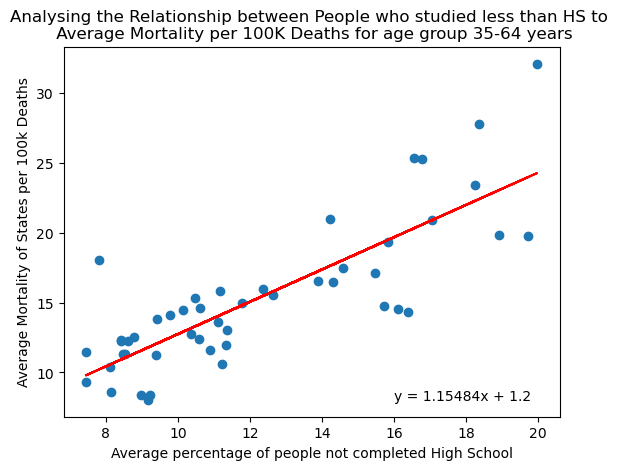

In [203]:
x_less_HS = data_groupby_state_less_HS
y_less_HS = data_groupby_state_mortality_stroke
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_less_HS, y_less_HS)
regress_values = x_less_HS * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x_less_HS, y_less_HS)
plt.plot(x_less_HS,regress_values,"r-")
plt.annotate(line_eq,(16, 8), fontsize=10)
plt.ylabel("Average Mortality of States per 100k Deaths")
plt.xlabel("Average percentage of people not completed High School")
plt.title("Analysing the Relationship between People who studied less than HS to \n Average Mortality per 100K Deaths for age group 35-64 years")
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")
# if slope < 0 :
#     print("The rate of change of dependent variable i.e Mortality per 100K for age group 35-64 Decreases as Median Income of State Increases, indicating Higher the Income of household \nthe lesser the chance of a person dying of Cardiovascular Health Disease. This is Also backed by the Rvalue showing a higher tendancy towards a negatvie co releation ")
# else:
#     print(" The rate of change of dependent variable i.e Mortality per 100K for age group 35-64 increases as Median Income of State increases ")

In [204]:
data1_stroke

,Year,"County, State",States,Disease Type,Mortality per 100K,Age Group,County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured
0,2018,"Autauga County, AL",Alabama,Stroke,23.5,Ages 35-64 years,55499.250,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
4,2018,"Baldwin County, AL",Alabama,Stroke,18.1,Ages 35-64 years,56782.710,30.155,19.429,10.212,29.693,10.512,7.462,59.858,10.276
8,2018,"Barbour County, AL",Alabama,Stroke,27.0,Ages 35-64 years,33632.111,24.744,8.478,4.901,35.504,26.369,5.899,45.039,11.281
14,2018,"Bibb County, AL",Alabama,Stroke,32.5,Ages 35-64 years,46878.500,24.718,8.065,4.145,47.615,15.455,7.348,60.625,7.285
16,2018,"Blount County, AL",Alabama,Stroke,20.2,Ages 35-64 years,48241.889,32.910,7.788,4.580,33.909,20.814,7.534,59.254,11.144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12028,2018,"Sweetwater County, WY",Wyoming,Stroke,11.2,Ages 35-64 years,72692.333,35.783,14.889,6.791,33.508,9.027,2.812,70.673,12.055
12032,2018,"Teton County, WY",Wyoming,Stroke,10.2,Ages 35-64 years,84741.250,24.310,38.995,18.975,12.948,4.778,3.165,79.055,10.075
12037,2018,"Uinta County, WY",Wyoming,Stroke,11.0,Ages 35-64 years,59718.667,37.350,10.323,4.880,40.133,7.310,4.577,66.067,12.490
12040,2018,"Washakie County, WY",Wyoming,Stroke,11.7,Ages 35-64 years,53835.000,37.873,14.827,6.427,30.323,10.550,6.840,62.403,15.430


In [205]:
data1_stroke["% more than HS Degree"] = 100 - data1_stroke["% less than a HS Degree"]
data1_stroke

C:\Users\ljm47\AppData\Local\Temp\ipykernel_29972\3227126288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_stroke["% more than HS Degree"] = 100 - data1_stroke["% less than a HS Degree"]


,Year,"County, State",States,Disease Type,Mortality per 100K,Age Group,County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured,% more than HS Degree
0,2018,"Autauga County, AL",Alabama,Stroke,23.5,Ages 35-64 years,55499.250,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979,87.038
4,2018,"Baldwin County, AL",Alabama,Stroke,18.1,Ages 35-64 years,56782.710,30.155,19.429,10.212,29.693,10.512,7.462,59.858,10.276,89.488
8,2018,"Barbour County, AL",Alabama,Stroke,27.0,Ages 35-64 years,33632.111,24.744,8.478,4.901,35.504,26.369,5.899,45.039,11.281,73.631
14,2018,"Bibb County, AL",Alabama,Stroke,32.5,Ages 35-64 years,46878.500,24.718,8.065,4.145,47.615,15.455,7.348,60.625,7.285,84.545
16,2018,"Blount County, AL",Alabama,Stroke,20.2,Ages 35-64 years,48241.889,32.910,7.788,4.580,33.909,20.814,7.534,59.254,11.144,79.186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12028,2018,"Sweetwater County, WY",Wyoming,Stroke,11.2,Ages 35-64 years,72692.333,35.783,14.889,6.791,33.508,9.027,2.812,70.673,12.055,90.973
12032,2018,"Teton County, WY",Wyoming,Stroke,10.2,Ages 35-64 years,84741.250,24.310,38.995,18.975,12.948,4.778,3.165,79.055,10.075,95.222
12037,2018,"Uinta County, WY",Wyoming,Stroke,11.0,Ages 35-64 years,59718.667,37.350,10.323,4.880,40.133,7.310,4.577,66.067,12.490,92.690
12040,2018,"Washakie County, WY",Wyoming,Stroke,11.7,Ages 35-64 years,53835.000,37.873,14.827,6.427,30.323,10.550,6.840,62.403,15.430,89.450


In [206]:
data_groupby_state_more_HS= data1_stroke.groupby(["States"])["% more than HS Degree"].mean()  #state median income 
data_groupby_state_more_HS

States
Alabama           81.643403
Arizona           83.615200
Arkansas          83.447067
California        84.292632
Colorado          90.621557
Connecticut       90.840250
Delaware          88.843333
Florida           85.416821
Georgia           81.742208
Hawaii            92.190750
Idaho             88.633452
Illinois          89.393951
Indiana           87.628250
Iowa              91.527576
Kansas            89.527952
Kentucky          81.084875
Maine             91.587187
Maryland          89.861250
Massachusetts     91.028500
Michigan          90.220361
Minnesota         91.875207
Mississippi       80.031439
Missouri          86.102678
Montana           91.571286
Nebraska          91.228987
Nevada            87.355000
New Hampshire     92.548000
New Jersey        89.110667
New Mexico        83.888967
New York          88.770306
North Carolina    84.178340
North Dakota      90.576980
Ohio              88.215636
Oklahoma          85.784026
Oregon            88.894600
Pennsylvania 

-1.1548448805272173
The correlation coefficient is -0.81767
The rate of change of dependent variable i.e Mortality  by STROKE per 100K for age group 35-64 Decreases as the percentage of students studying more than HS increases


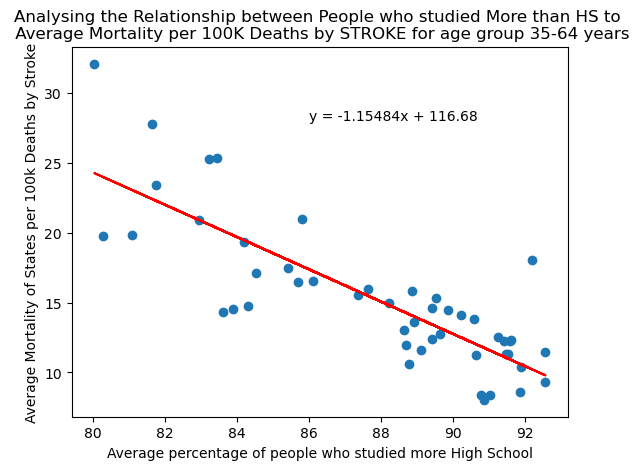

In [207]:
x_more_HS = data_groupby_state_more_HS
y_more_HS = data_groupby_state_mortality_stroke
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_more_HS, y_more_HS)
regress_values = x_more_HS * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x_more_HS, y_more_HS)
plt.plot(x_more_HS,regress_values,"r-")
plt.annotate(line_eq,(86, 28), fontsize=10)
plt.ylabel("Average Mortality of States per 100k Deaths by Stroke")
plt.xlabel("Average percentage of people who studied more High School")
plt.title("Analysing the Relationship between People who studied More than HS to \n Average Mortality per 100K Deaths by STROKE for age group 35-64 years")
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")
if slope < 0 :
    print("The rate of change of dependent variable i.e Mortality  by STROKE per 100K for age group 35-64 Decreases as the percentage of students studying more than HS increases")


In [208]:
df

,Year,"County, State",States,Disease Type,Mortality per 100K,Age Group,County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured
0,2018,"Autauga County, AL",Alabama,Stroke,23.5,Ages 35-64 years,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
1,2018,"Autauga County, AL",Alabama,Coronary Heart Disease,87.9,Ages 35-64 years,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
2,2018,"Autauga County, AL",Alabama,Stroke,368.6,Ages 65 years and older,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
3,2018,"Autauga County, AL",Alabama,Coronary Heart Disease,689.9,Ages 65 years and older,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
4,2018,"Baldwin County, AL",Alabama,Stroke,18.1,Ages 35-64 years,56782.71,30.155,19.429,10.212,29.693,10.512,7.462,59.858,10.276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12043,2018,"Washakie County, WY",Wyoming,Coronary Heart Disease,436.8,Ages 65 years and older,53835.00,37.873,14.827,6.427,30.323,10.550,6.840,62.403,15.430
12044,2018,"Weston County, WY",Wyoming,Coronary Heart Disease,58.3,Ages 35-64 years,53141.00,37.205,13.465,5.705,35.850,7.770,8.140,63.770,13.325
12045,2018,"Weston County, WY",Wyoming,Stroke,236.5,Ages 65 years and older,53141.00,37.205,13.465,5.705,35.850,7.770,8.140,63.770,13.325
12046,2018,"Weston County, WY",Wyoming,Coronary Heart Disease,592.8,Ages 65 years and older,53141.00,37.205,13.465,5.705,35.850,7.770,8.140,63.770,13.325


In [209]:
df_quartile_35= df.loc[df["Age Group"]== "Ages 35-64 years"]
df_quartile_35

,Year,"County, State",States,Disease Type,Mortality per 100K,Age Group,County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured
0,2018,"Autauga County, AL",Alabama,Stroke,23.5,Ages 35-64 years,55499.250,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
1,2018,"Autauga County, AL",Alabama,Coronary Heart Disease,87.9,Ages 35-64 years,55499.250,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
4,2018,"Baldwin County, AL",Alabama,Stroke,18.1,Ages 35-64 years,56782.710,30.155,19.429,10.212,29.693,10.512,7.462,59.858,10.276
7,2018,"Baldwin County, AL",Alabama,Coronary Heart Disease,73.4,Ages 35-64 years,56782.710,30.155,19.429,10.212,29.693,10.512,7.462,59.858,10.276
8,2018,"Barbour County, AL",Alabama,Stroke,27.0,Ages 35-64 years,33632.111,24.744,8.478,4.901,35.504,26.369,5.899,45.039,11.281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12039,2018,"Uinta County, WY",Wyoming,Coronary Heart Disease,35.1,Ages 35-64 years,59718.667,37.350,10.323,4.880,40.133,7.310,4.577,66.067,12.490
12040,2018,"Washakie County, WY",Wyoming,Stroke,11.7,Ages 35-64 years,53835.000,37.873,14.827,6.427,30.323,10.550,6.840,62.403,15.430
12041,2018,"Washakie County, WY",Wyoming,Coronary Heart Disease,48.5,Ages 35-64 years,53835.000,37.873,14.827,6.427,30.323,10.550,6.840,62.403,15.430
12044,2018,"Weston County, WY",Wyoming,Coronary Heart Disease,58.3,Ages 35-64 years,53141.000,37.205,13.465,5.705,35.850,7.770,8.140,63.770,13.325


In [210]:
df_quartile_351 = df_quartile_35.groupby("States", as_index=False)["Mortality per 100K"].mean()
df_quartile_351
# Average Mortality rate for both type of diseases , State wise

,States,Mortality per 100K
0,Alabama,50.975373
1,Arizona,38.163333
2,Arkansas,70.032667
3,California,31.173684
4,Colorado,25.867213
5,Connecticut,24.650000
6,Delaware,31.716667
7,Florida,41.660448
8,Georgia,46.861950
9,Hawaii,31.250000


In [213]:
quartiles = df_quartile_351['Mortality per 100K'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Mortality per 100K is: {lowerq}")
print(f"The upper quartile of Mortality per 100K is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of Mortality is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Mortality per 100K is: 30.383184523809522
The upper quartile of Mortality per 100K is: 44.33177272727273
The interquartile range of occupancy is: 13.948588203463206
The the median of Mortality is: 37.996833333333335 
Values below 9.46030221861471 could be outliers.
Values above 65.25465503246754 could be outliers.


0     50.975373
1     38.163333
2     70.032667
3     31.173684
4     25.867213
5     24.650000
6     31.716667
7     41.660448
8     46.861950
9     31.250000
10    29.628571
11    40.213235
12    43.209783
13    37.331818
14    41.144231
15    64.913750
16    26.871875
17    34.335417
18    21.628571
19    42.704217
20    27.300000
21    63.233537
22    51.207391
23    39.337755
24    30.705000
25    38.066667
26    28.755000
27    29.252381
28    43.646667
29    32.925000
30    44.955500
31    37.927000
32    44.123864
33    58.085714
34    25.821429
35    34.850746
36    24.590000
37    50.084783
38    39.023438
39    68.198421
40    50.976132
41    24.731481
42    31.432143
43    41.188384
44    29.058974
45    51.686364
46    30.634722
47    31.919565
Name: Mortality per 100K, dtype: float64


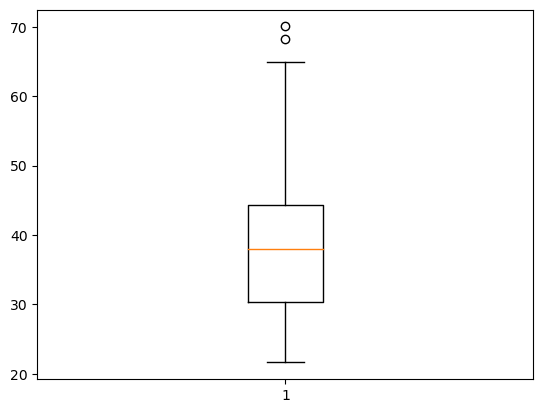

In [216]:
Mortality= df_quartile_351["Mortality per 100K"]
print(Mortality)
fig1, ax1 =plt.subplots()
ax1.boxplot(Mortality)
plt.show()